<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv", float_precision='round_trip')

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: title={'center': 'Distribution of Salaries (Converted to USD)'}, ylabel='Density'>

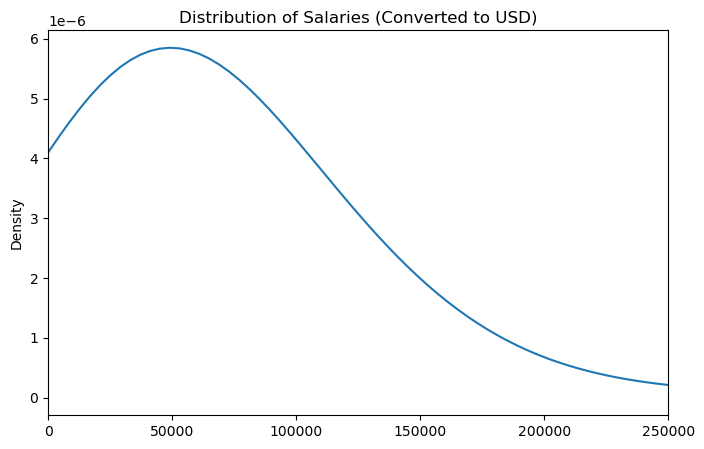

In [3]:
# Distribution plot
df['ConvertedComp'].plot(kind='density', 
                         title='Distribution of Salaries (Converted to USD)',
                         xlabel='Salary',
                         xlim=[0, 250000],
                         figsize=(8,5))






Plot the histogram for the column `ConvertedComp`.


<Axes: title={'center': 'Histogram of Salaries (Converted to USD)'}, ylabel='Frequency'>

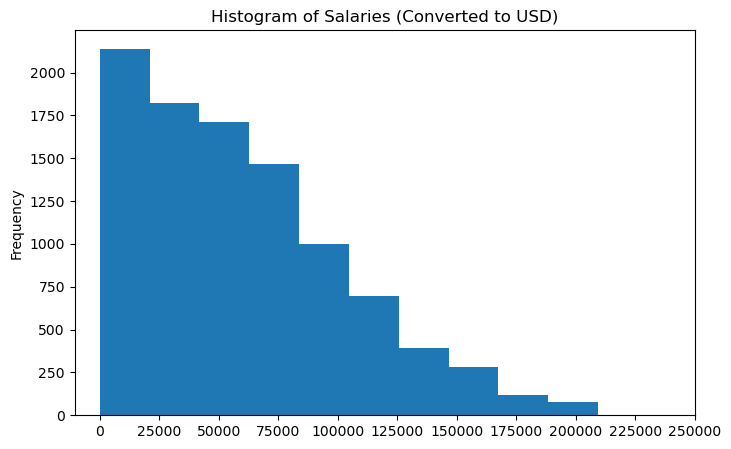

In [22]:
# Histogram of Salaries
count, bin_edges = np.histogram(df['ConvertedComp'], range=(0, 250000))

df['ConvertedComp'].plot(kind='hist', figsize=(8,5), xticks=bin_edges,
                         title='Histogram of Salaries (Converted to USD)')

What is the median of the column `ConvertedComp`?


In [5]:
# Median of CovertedComp column before 
df["ConvertedComp"].median()


57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# Value counts of Gender column
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# Converted Comp median grouped by Gender
df['ConvertedComp'].groupby(df['Gender']).median()


Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: title={'center': 'Histogram of Survey Respondant Age'}, xlabel='Age', ylabel='Frequency'>

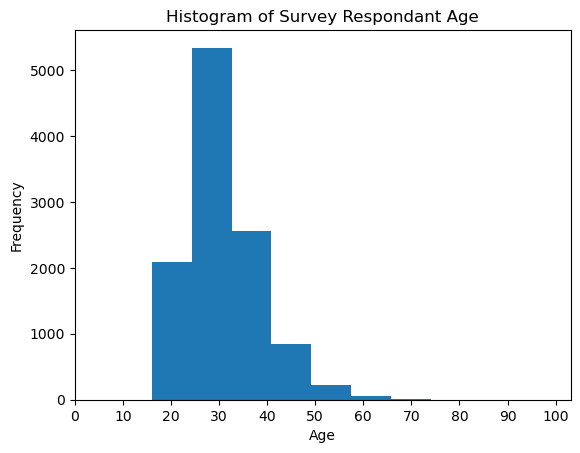

In [9]:
# Histogram of Age column
count, bin_edges = np.histogram(df['Age'], range=(0,100))

df['Age'].plot(kind='hist', 
               xticks=bin_edges,
               xlabel='Age',
               title='Histogram of Survey Respondant Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: title={'center': 'Boxplot of Survey Respondant Salaries'}>

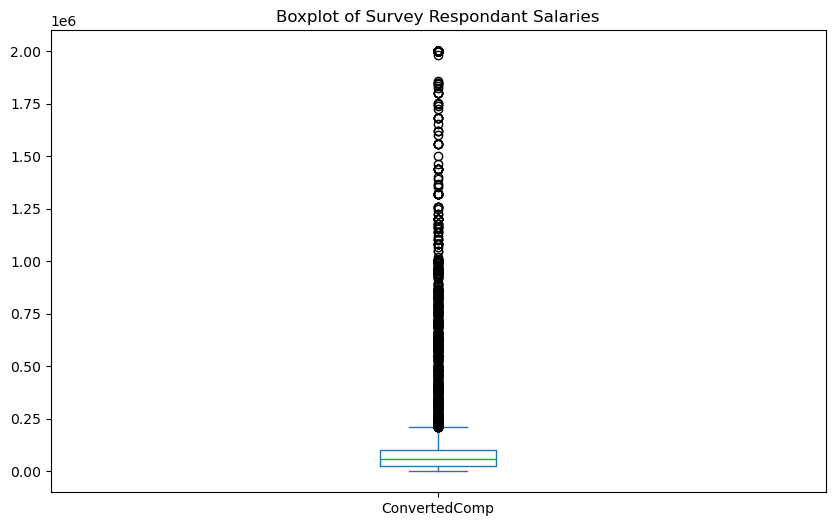

In [10]:
# Create boxplot of ConvertedComp to identify outliers
df['ConvertedComp'].plot(kind='box', figsize=(10,6),
                         title='Boxplot of Survey Respondant Salaries')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# Calculate Inter Quartile range of ConvertedComp
q75, q25 = np.nanpercentile(df['ConvertedComp'], [75, 25])
iqr = q75 - q25
iqr

73132.0

Find out the upper and lower bounds.


In [12]:
# Calculate upper and lower bounds
lower = q25 - 1.5*iqr
upper = q75 + 1.5*iqr

print(lower)
print(upper)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# Count number of values of outliers
count_outliers = 0

for value in df['ConvertedComp'].values: #Converts column values into an array
    if value >= upper:
        count_outliers += 1 
    
print(count_outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['ConvertedComp'] >= upper)[0]
df.drop(index=upper_array, inplace=True)

df.shape

(10519, 85)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# Correlation calculation
dfcorr = df.corr(numeric_only=True)
dfcorr['Age']


Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64

In [16]:
df['ConvertedComp'].mean()

59883.20838915799

In [17]:
df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
